# Tests

## Example 1: Simple

In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [2]:
kwargs = {
    'symbolic_composition': True,
}

In [3]:
R.<t,x,y> = RIF[]

In [4]:
TM_ORDER = 4

In [5]:
odes = [
    R(1),
    -y,
    x,
]
initials = [(0,0), (4,5), (1,2)]
system = System(
    R,
    [t, x, y],
    initials,
    odes,
)
reach = system.reach(2*pi, step=0.1, order=TM_ORDER,
              precompose_taylor_models=False,
              symbolic_composition=False)
reach_superfine = system.reach(2*pi, step=0.01, order=TM_ORDER,
              precompose_taylor_models=False,
              symbolic_composition=False)

calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2


In [6]:
reach_points = [system.with_y0([(0,0), (4 + k), (1 + k)]).reach(2*pi, step=0.01, order=10,
              precompose_taylor_models=False,
              symbolic_composition=False)
    for k in srange(0, 1, 0.1)]

calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 4.0000000000000000]', '[1.0000000000000000 .. 1.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..4.0]
C = [1.0..1.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0999999999999996 .. 4.0999999999999997]', '[1.1000000000000000 .. 1.1000000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.1..4.1]
C = [1.1..1.1]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.2000000000000001 .. 4.2000000000000002]', '[1.1999999999999999 .. 1.2000000000000000]']
ode in polynomial ring
crude_root

In [7]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [8]:
reach.res

2

In [9]:
#S = Atomic(7 - (x + 1)**2 + y + x); S

In [10]:
#S = Atomic(3 - y**2 + y); S

In [11]:
# Very Weird S
S = Atomic(3 - y**2 + y + x**5 + x**3*y**6); S

Atomic(x^3*y^6 + x^5 - y^2 + y + 3)

PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe5043f3c80>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x
PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe50434f120>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x
PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe50434f2e0>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x
PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe50434f040>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditi

/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


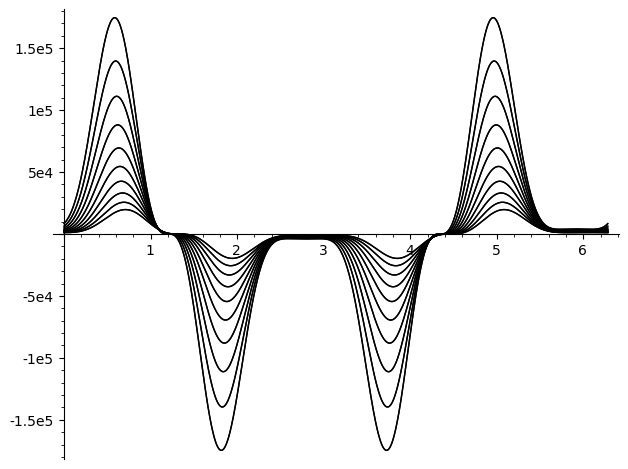

In [12]:
p_points = sum([
    S.sage_plot(r, symbolic_composition=False,
                color=('black', 'black'),
                fillcolor=('black',))
    for r in reach_points
], Graphics())
p_points

PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe5043f3ba0>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x


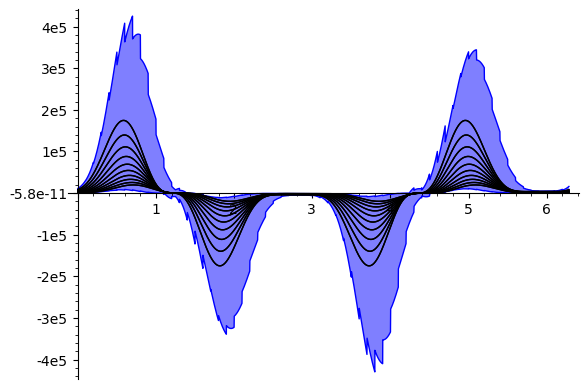

In [13]:
p1 = S.sage_plot(reach); p1 + p_points

PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe5043f3f20>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x


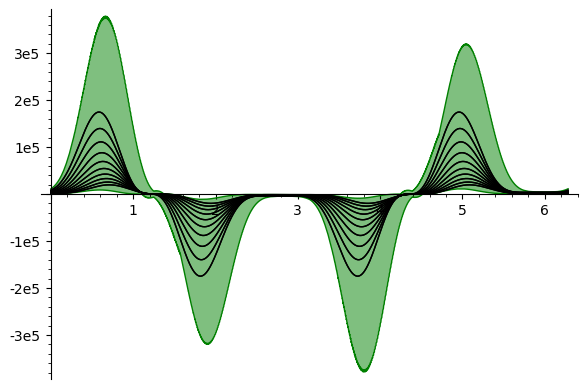

In [14]:
p3 = S.sage_plot(reach_superfine, symbolic_composition=False,
                color=('green', 'green'),
                fillcolor=('green',)); p3 + p_points

PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe5043f3ba0>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x


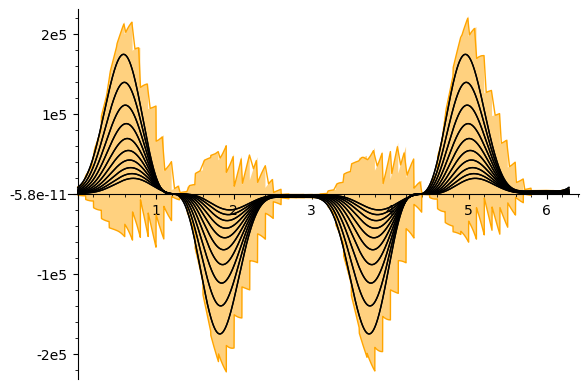

In [15]:
p2 = S.sage_plot(reach, symbolic_composition=True,
                color=('orange', 'orange'),
                fillcolor=('orange',)); p2 + p_points

PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe5043f3f20>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x


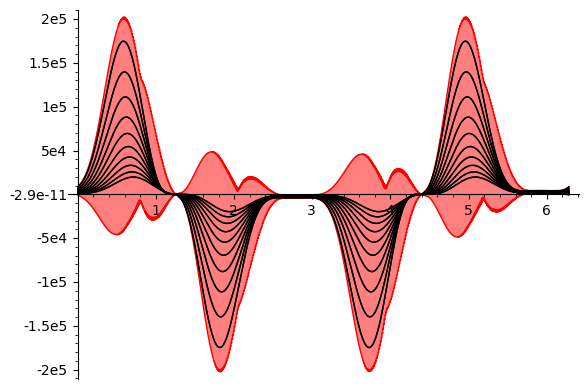

In [16]:
p4 = S.sage_plot(reach_superfine, symbolic_composition=True,
                color=('red', 'red'),
                fillcolor=('red',)); p4 + p_points

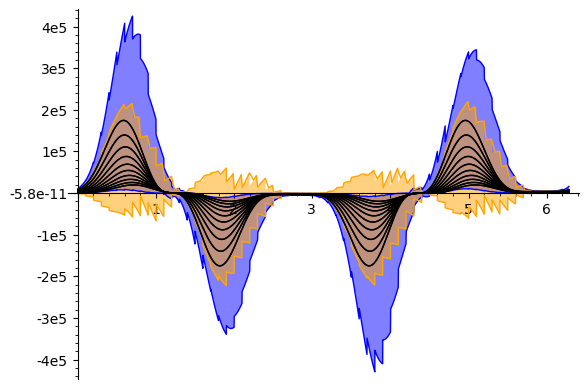

In [17]:
p1+p2+p_points

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.03 seconds
Computed 63 flowpipes in 0.02987847907934338 sec
PolyObserver(x^3*y^6 + x^5 - y^2 + y + 3, <flowstar.reachability.Reach object at 0x7fe4f9acf040>, 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 6*x^4*y^5 - 3*x^2*y^7 - 5*x^4*y - 2*x*y + x
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.08 seconds
roots = [

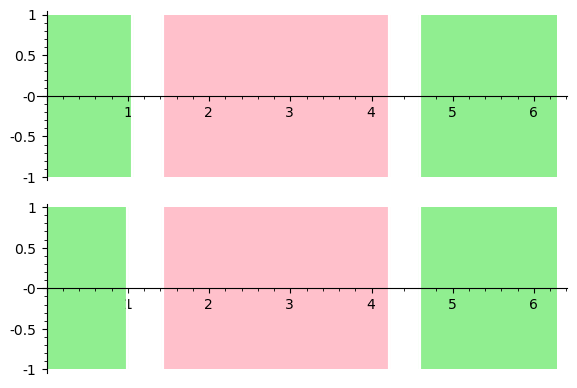

In [18]:
sig1 = S.signal_for_system(system, 2*pi, symbolic_composition=False)
sig2 = S.signal_for_system(system, 2*pi, symbolic_composition=True)

graphics_array([
    sig1.plot(),
    sig2.plot(),
], ncols=1)

In [19]:
sig1

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 1.0500091210691918], True), ([1.4000000000000010 .. 4.1999999999999771], False), ([4.6000000000000067 .. 6.2831853071795872], True)], mask=None)

In [20]:
sig2

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.99999999999999901], True), ([1.4000000000000010 .. 4.1999999999999771], False), ([4.6000000000000067 .. 6.2831853071795872], True)], mask=None)